In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data AllMoviesDetailsCleaned.csv

In [2]:
data_movie = pd.read_csv("data/AllMoviesDetailsCleaned.csv", delimiter=';')

/tmp/ipykernel_6996/2101519420.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_movie = pd.read_csv("data/AllMoviesDetailsCleaned.csv", delimiter=';')


In [3]:
data_movie

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329039,469215,0,Documentary|History|TV Movie,tt5430190,en,The Day Hitler Died,The story of Hitler’s final hours told by peop...,0.0045,History Channel,United States of America,...,46.0,Deutsch,Released,"April 30th, 1945",The Day Hitler Died,7.0,1,1,1,2
329040,469216,0,NaN,NaN,de,Mobb Deep - Life of the Infamous: The Videos,NaN,0.00045,Sony Music Entertainmant,United States of America,...,NaN,English,Released,NaN,Mobb Deep - Life of the Infamous: The Videos,9.0,1,1,1,1
329041,469217,0,Drama|Comedy,NaN,en,#idiot,"In the modern day pursuit of fame and fortune,...",1.37217,none,Malaysia,...,11.0,English,Released,NaN,#idiot,0.0,0,0,1,1
329042,469218,0,Drama|Comedy,tt6391664,en,Conspiracy P.I.E,Director Levi A. Taylor invites you on a nosta...,0.0096,none,United States of America,...,12.0,English,Released,NaN,Conspiracy P.I.E,0.0,0,0,1,1


In [4]:
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329044 entries, 0 to 329043
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           329044 non-null  int64  
 1   budget                       329044 non-null  int64  
 2   genres                       207515 non-null  object 
 3   imdb_id                      250564 non-null  object 
 4   original_language            328841 non-null  object 
 5   original_title               329043 non-null  object 
 6   overview                     278060 non-null  object 
 7   popularity                   329044 non-null  object 
 8   production_companies         329044 non-null  object 
 9   production_countries         329044 non-null  object 
 10  release_date                 304998 non-null  object 
 11  revenue                      329044 non-null  int64  
 12  runtime                      292252 non-null  float64
 13 

## Checking null value

1) Checking the null and empty data for features and target (revenue) in movie cleaned dataset

In [5]:
data_movie.isnull().sum()

id                                  0
budget                              0
genres                         121529
imdb_id                         78480
original_language                 203
original_title                      1
overview                        50984
popularity                          0
production_companies                0
production_countries                0
release_date                    24046
revenue                             0
runtime                         36792
spoken_languages                 4460
status                           1988
tagline                        276113
title                               1
vote_average                        0
vote_count                          0
production_companies_number         0
production_countries_number         0
spoken_languages_number             0
dtype: int64

In [6]:
(data_movie['revenue'] == 0).sum()

320354

2) Drop the row with zero revenue row 

In [15]:
data_movie_valid = data_movie[data_movie['revenue'] != 0]
data_movie_valid.head(5)

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
6,11,11000000,Adventure|Action|Science Fiction,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,10.492614,Lucasfilm,United States of America,...,121.0,English,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.0,6168,2,1,1
7,12,94000000,Animation|Family,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",9.915573,Pixar Animation Studios,United States of America,...,100.0,English,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,5531,1,1,1
8,13,55000000,Comedy|Drama|Romance,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,10.351236,Paramount Pictures,United States of America,...,142.0,English,Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,7204,1,1,1


Histogram Revenue vs Year

In [20]:
data_movie_valid['release_date'].isnull().sum()

104

In [24]:
data_movie_valid = data_movie_valid[data_movie_valid.release_date.notnull()]
data_movie_valid

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
6,11,11000000,Adventure|Action|Science Fiction,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,10.492614,Lucasfilm,United States of America,...,121.0,English,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.0,6168,2,1,1
7,12,94000000,Animation|Family,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",9.915573,Pixar Animation Studios,United States of America,...,100.0,English,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,5531,1,1,1
8,13,55000000,Comedy|Drama|Romance,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,10.351236,Paramount Pictures,United States of America,...,142.0,English,Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,7204,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328040,468073,100,History,NaN,hi,Veer Savarkar,Veer Savarkar is a Hindi language[1] 2001 Indi...,0.008836,none,none,...,165.0,हिन्दी,Released,Story Of India's Greatest Freedom Fighter,Veer Savarkar,0.0,0,0,0,1
328433,468517,200,Documentary,NaN,es,Cine de Emboscada,NaN,0.141433,zoowomania,Spain,...,NaN,Español,Released,NaN,Cine de Emboscada,0.0,0,1,1,1
328487,468579,1000,Drama|Fantasy,tt5821772,en,Thoughtless,"A writer who has lost his thoughts, tries to f...",0.01751,Empty Spaces Pictures,United States of America,...,10.0,none,Released,NaN,Thoughtless,0.0,0,1,3,0
328547,468656,0,Action|Adventure|Animation|Comedy|Crime|Family...,tt5539376,ur,3 Bahadur: The Revenge of Baba Balaam,3 Bahadur: The Revenge of Baba Balaam is a Pak...,0.096195,Waadi Animations,Pakistan,...,108.0,اردو,Released,The Revenge of Baba Balaam,3 Braves: The Revenge of Baba Balaam,8.0,1,3,1,1


In [33]:
data_movie_valid['release_date'].value_counts()

10/09/2010    13
01/01/2003    10
25/12/2014     9
09/09/2011     9
25/12/2015     9
              ..
30/04/1997     1
14/10/1983     1
19/08/2009     1
15/12/1976     1
01/12/2016     1
Name: release_date, Length: 5221, dtype: int64

In [40]:
data_movie_valid['release_date'] = pd.to_datetime(data_movie_valid['release_date'], format='%d/%m/%Y')
data_movie_valid['release_date']

2        1995-12-25
3        1993-10-15
6        1977-05-25
7        2003-05-30
8        1994-07-06
            ...    
328040   2001-11-16
328433   2017-06-26
328487   2016-06-20
328547   2016-12-15
328796   2016-12-01
Name: release_date, Length: 8586, dtype: datetime64[ns]

<BarContainer object of 8586 artists>

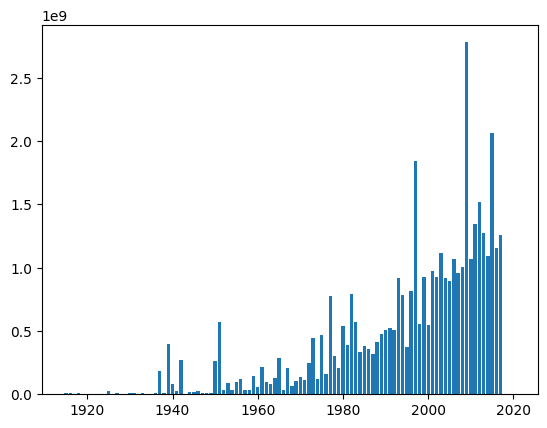

In [46]:
plt.bar(data_movie_valid['release_date'].dt.year, data_movie_valid['revenue'])

<AxesSubplot:xlabel='release_date'>

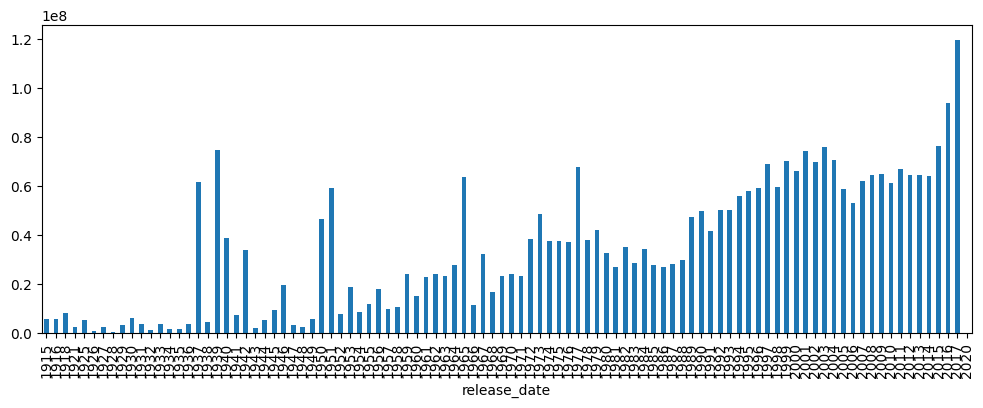

In [50]:
fig, axs = plt.subplots(figsize=(12, 4)) # setting the size 

data_movie_valid.groupby(data_movie_valid['release_date'].dt.year)["revenue"].mean().plot(kind='bar')

In [54]:
data_movie_valid_num = data_movie_valid.select_dtypes(include= ['int64', 'float64'])
data_movie_valid_num

,id,budget,revenue,runtime,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
2,5,4000000,4300000,98.0,6.5,485,2,1,1
3,6,0,12136938,110.0,6.5,69,3,2,1
6,11,11000000,775398007,121.0,8.0,6168,2,1,1
7,12,94000000,940335536,100.0,7.6,5531,1,1,1
8,13,55000000,677945399,142.0,8.2,7204,1,1,1
...,...,...,...,...,...,...,...,...,...
328040,468073,100,150,165.0,0.0,0,0,0,1
328433,468517,200,200,NaN,0.0,0,1,1,1
328487,468579,1000,700,10.0,0.0,0,1,3,0
328547,468656,0,640691,108.0,8.0,1,3,1,1


In [57]:
data_movie_valid_num.describe()

,id,budget,revenue,runtime,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
count,8586.000000,8.586000e+03,8.586000e+03,8461.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000
mean,86219.537037,1.922044e+07,5.874894e+07,105.185321,5.837887,425.580247,2.438388,1.265898,1.379804
std,115919.838121,3.499573e+07,1.369226e+08,28.193077,1.777111,934.633321,2.148476,0.790594,0.871904
min,5.000000,0.000000e+00,-1.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10217.250000,0.000000e+00,8.870072e+05,93.000000,5.400000,11.000000,1.000000,1.000000,1.000000
50%,28872.500000,3.850790e+06,1.036860e+07,103.000000,6.200000,89.000000,2.000000,1.000000,1.000000
75%,112945.750000,2.400000e+07,5.102241e+07,118.000000,6.800000,383.750000,3.000000,1.000000,2.000000
max,468938.000000,3.800000e+08,2.781506e+09,360.000000,10.000000,12811.000000,26.000000,14.000000,9.000000


<AxesSubplot:>

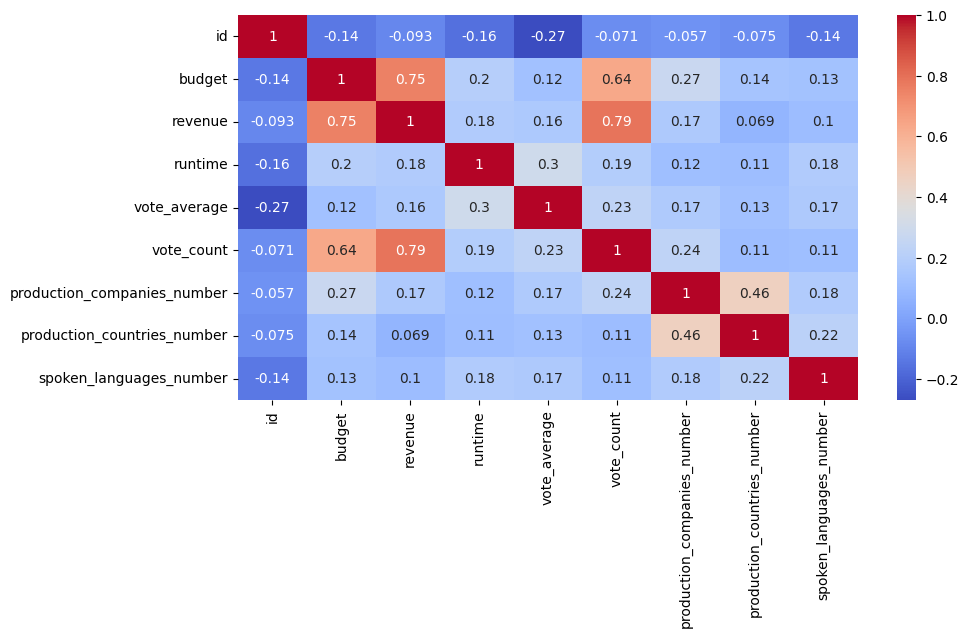

In [56]:
plt.figure(figsize = (10, 5))

sns.heatmap(
    data_movie_valid_num.corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 10})

1) Consider to drop genres, imdb_id, original_language, tagline, overview
2) Set lower threshold for budget and revenue, unrealistics number -- remove from 

## Loading AllMoviesCastingRaw.csv

In [8]:
data_movie_cast = pd.read_csv("data/AllMoviesCastingRaw.csv", delimiter=';')

In [9]:
data_movie_cast

,id,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name
0,2,Turo Pajala,0,Susanna Haavisto,0.0,Matti Pellonpää,2,Eetu Hilkamo,0,none,0,4,Aki Kaurismäki,0.0,1,none,0,Aki Kaurismäki,Raija Talvio
1,3,Matti Pellonpää,2,Kati Outinen,1.0,Sakari Kuosmanen,2,Esko Nikkari,2,Kylli Köngäs,0,7,Aki Kaurismäki,0.0,1,Mika Kaurismäki,1,Aki Kaurismäki,Raija Talvio
2,5,Tim Roth,2,Antonio Banderas,2.0,Jennifer Beals,1,Madonna,1,Marisa Tomei,1,24,Allison Anders,1.0,4,Lawrence Bender,1,none,Margaret Goodspeed
3,6,Emilio Estevez,2,Cuba Gooding Jr.,2.0,Denis Leary,2,Jeremy Piven,2,Peter Greene,2,15,Stephen Hopkins,2.0,1,Gene Levy,1,Lewis Colick,Tim Wellburn
4,8,none,0,none,0.0,none,0,none,0,none,0,0,Timo Novotny,0.0,1,Timo Novotny,2,Michael Glawogger,Timo Novotny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329039,469215,none,0,Mark Strong,2.0,Traudl Junge,0,Adolf Hitler,2,Michael A. Musmanno,0,5,Craig Collinson,0.0,1,none,0,none,none
329040,469216,none,0,none,0.0,none,0,none,0,none,0,0,none,1.0,0,none,0,none,none
329041,469217,none,0,Garrye,0.0,Kenny Gan,0,Amanda Ng,0,Michael Chen,0,4,Adrian Lai,0.0,1,none,0,Adrian Lai,none
329042,469218,none,0,Evan Silcox,0.0,Zane Penny,0,Rebecca Barker,0,Richie Goldstein,0,6,Levi A. Taylor,0.0,1,none,0,Levi A. Taylor,none


In [10]:
data_movie_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329044 entries, 0 to 329043
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               329044 non-null  int64  
 1   actor1_name      329044 non-null  object 
 2   actor1_gender    329044 non-null  int64  
 3   actor2_name      329044 non-null  object 
 4   actor2_gender    329043 non-null  float64
 5   actor3_name      329044 non-null  object 
 6   actor3_gender    329044 non-null  int64  
 7   actor4_name      329044 non-null  object 
 8   actor4_gender    329044 non-null  int64  
 9   actor5_name      329044 non-null  object 
 10  actor5_gender    329044 non-null  int64  
 11  actor_number     329044 non-null  int64  
 12  director_name    329044 non-null  object 
 13  director_gender  329043 non-null  float64
 14  director_number  329044 non-null  int64  
 15  producer_name    329044 non-null  object 
 16  producer_number  329044 non-null  int6

In [11]:
data_movie_cast.isnull().sum()

id                 0
actor1_name        0
actor1_gender      0
actor2_name        0
actor2_gender      1
actor3_name        0
actor3_gender      0
actor4_name        0
actor4_gender      0
actor5_name        0
actor5_gender      0
actor_number       0
director_name      0
director_gender    1
director_number    0
producer_name      0
producer_number    0
screeplay_name     0
editor_name        0
dtype: int64